## Data Science Salary Insights
Ollana Gonzalez

# Project 1 - Parts 1 & 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df2 = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Data Cleaning

In [5]:
df.shape

(8523, 12)

- There are 8523 rows and 12 columns.

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 - All other data types are as they should be.

#Duplicated Data

In [7]:
df.duplicated().sum()

0

- There are 0 duplicates in the dataset.

#Missing Values

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- There are 1436 missing values in the Item_Weight column.
- There are 2410 missing values in the Outlet_Size.


In [10]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
df['Item_Weight'] = df['Item_Weight'].fillna(value = 'Unknown')

In [12]:
df['Item_Weight'].value_counts()

Unknown    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64

In [13]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

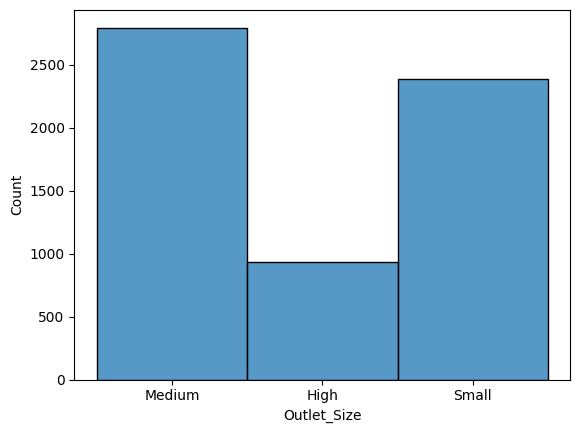

In [14]:
ax = sns.histplot(data = df, x = 'Outlet_Size')

In [15]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')

In [16]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [17]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#Fixing Data Types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


#Summary Statistics for Numerical Values

In [19]:
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


In [20]:
stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,0.066132,140.992782,1997.831867,2181.288914
min,0.000000,31.290000,1985.000000,33.290000
max,0.328391,266.888400,2009.000000,13086.964800


# Part 3

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [22]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

Histogram

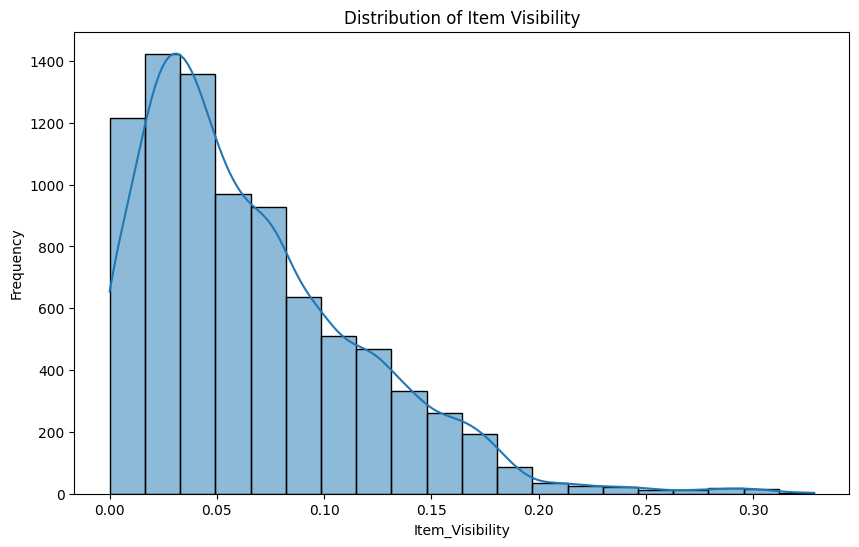

In [23]:
# Visualization 1: Histogram for Item Visibility
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Visibility'], bins=20, kde=True)
plt.title('Distribution of Item Visibility')
plt.xlabel('Item_Visibility')
plt.ylabel('Frequency')
plt.show()

The frequency of the item visibility gets consistently low as the item visibility increases.

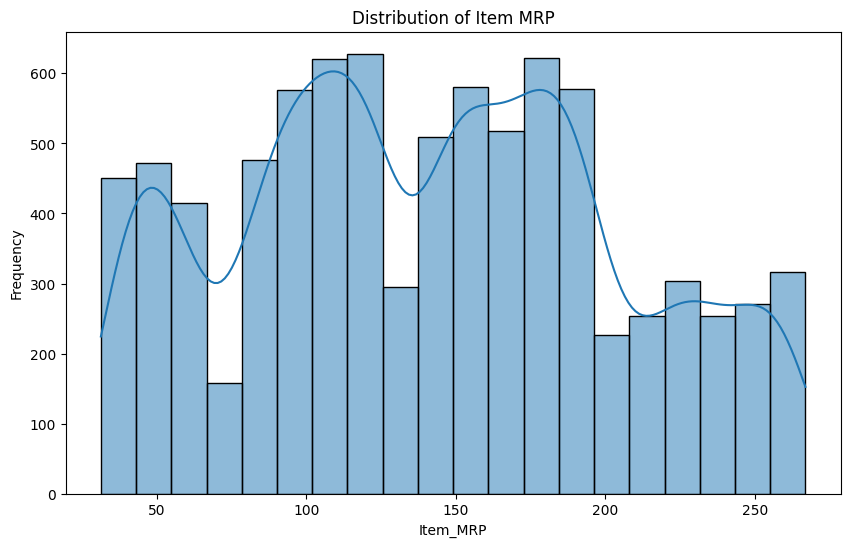

In [24]:
# Visualization 2: Histogram for Item MRP
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_MRP'], bins=20, kde=True)
plt.title('Distribution of Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Frequency')
plt.show()

The frequency of the Item MRP reached its peak at around 100, with over 600 frequency. It reached its lowest pont at around 250, with over 100 frequency.

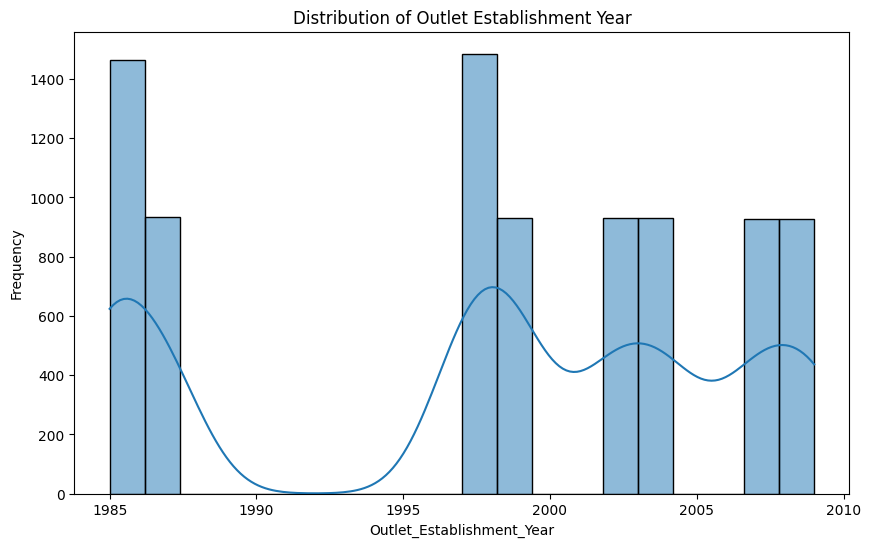

In [25]:
# Visualization 3: Histogram for Outlet Establishment Year
plt.figure(figsize=(10, 6))
sns.histplot(df['Outlet_Establishment_Year'], bins=20, kde=True)
plt.title('Distribution of Outlet Establishment Year')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Frequency')
plt.show()

During 1985, the frequecy of the outlet establishment was over 600, but it dropped close to 0 during 1990-1995. However it has begun to rise again to over 600 in between 1995 and 2000.

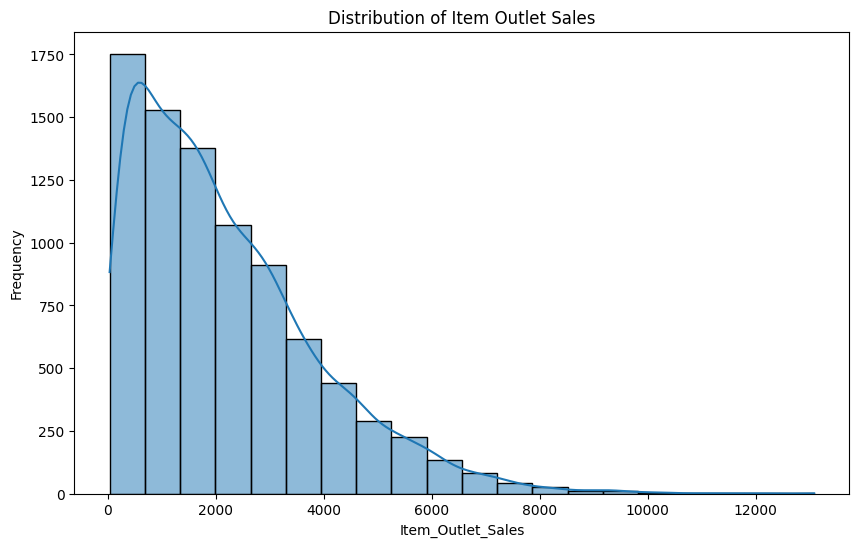

In [26]:
# Visualization 3: Histogram for Item Outlet Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], bins=20, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

The histogram visualization summarizes the frequency distribution of the data. As the item outlet sales increases, the frequency decreases. The two variables have inverse relationship.

Boxplot

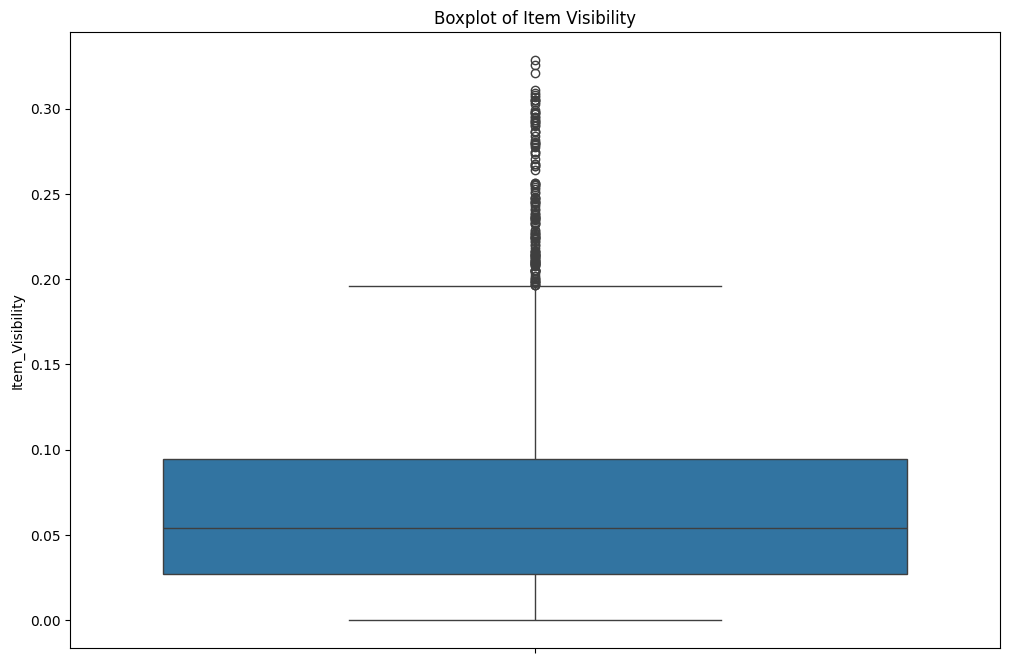

In [27]:
# Visualization 1: Boxplot for Item Visibility
plt.figure(figsize=(12, 8))
sns.boxplot(y='Item_Visibility', data=df)
plt.title('Boxplot of Item Visibility')
plt.ylabel('Item_Visibility')
plt.show();

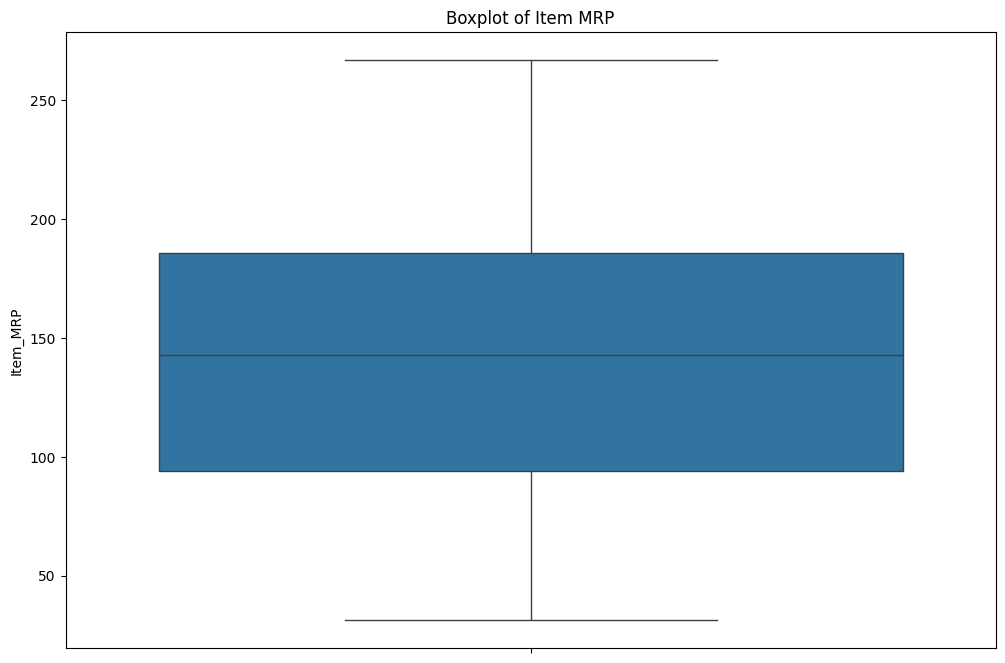

In [28]:
# Visualization 2: Boxplot for Item MRP
plt.figure(figsize=(12, 8))
sns.boxplot(y='Item_MRP', data=df)
plt.title('Boxplot of Item MRP')
plt.ylabel('Item_MRP')
plt.show();

The data shows a normal distribution of the Item MRP.

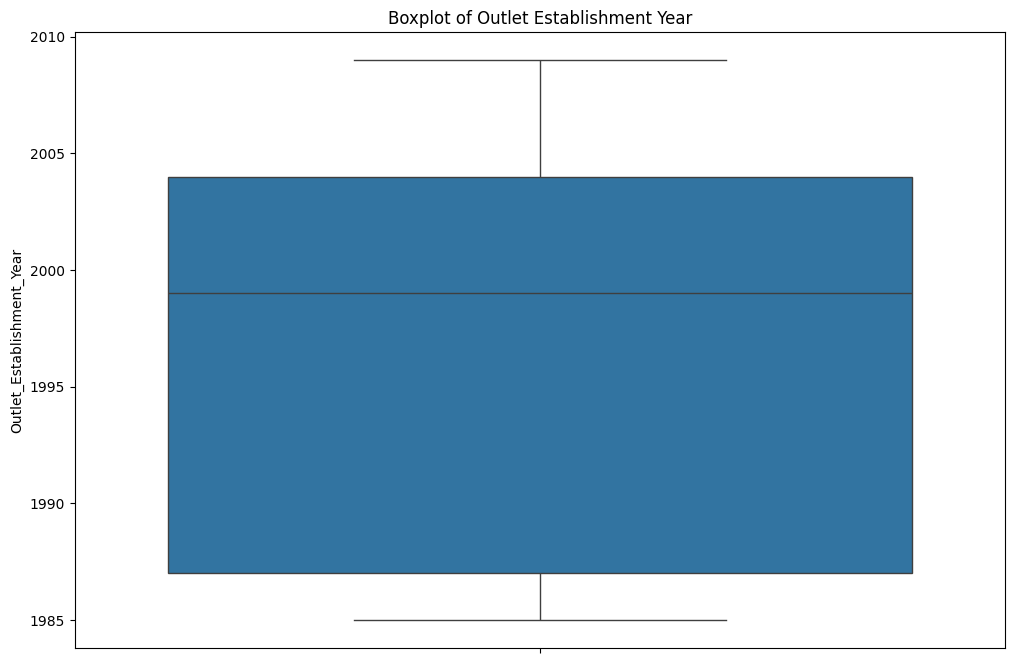

In [29]:
# Visualization 3: Boxplot for Outlet Establishment Year
plt.figure(figsize=(12, 8))
sns.boxplot(y='Outlet_Establishment_Year', data=df)
plt.title('Boxplot of Outlet Establishment Year')
plt.ylabel('Outlet_Establishment_Year')
plt.show();

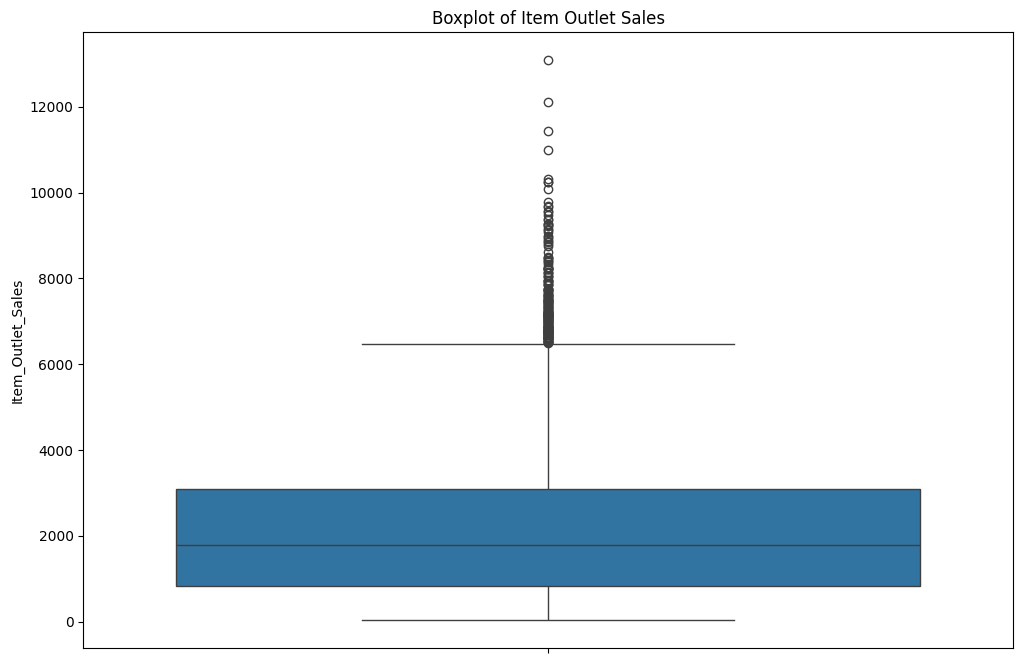

In [30]:
# Visualization 4: Boxplot for Item Outlet Sales
plt.figure(figsize=(12, 8))
sns.boxplot(y='Item_Outlet_Sales', data=df)
plt.title('Boxplot of Item Outlet Sales')
plt.ylabel('Item_Outlet_Sales')
plt.show();

# Countplot

In [31]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [32]:
df[cat_cols].nunique()

Item_Identifier         1559
Item_Weight              416
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [33]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.00,-0.00,-0.07,-0.13
Item_MRP,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.13,0.57,-0.05,1.00


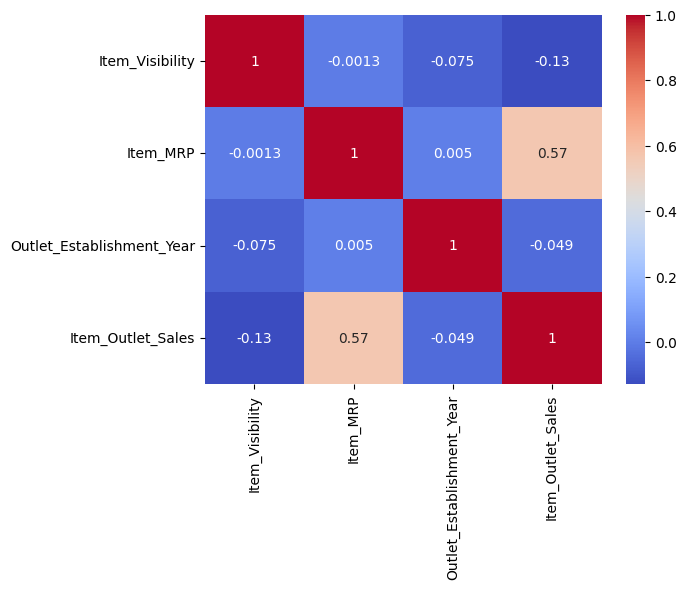

In [34]:
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

The heatmap visualizes the relationships between the features. The project shows how the visualizations help show the different aspects of the dataset. Pairs such as Item MRP and Item Outlet Sales have correlation of 0.57 which has the strongest correlation in the data.

# Part 4

In [35]:
df=pd.read_csv('/content/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [38]:
# inspecting feature
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

<ipython-input-36-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


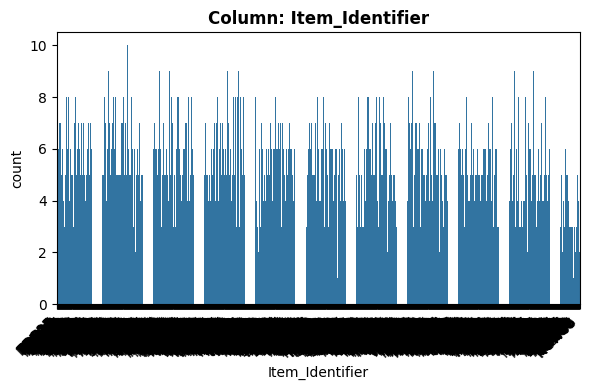

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [39]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)

Categorical

How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)

0

Is the feature constant or quasi-constant?

Not constant nor quasi-constant

What is the cardinality? Is it high (>10)?

0.12%

Would we know this feature before the target is determined?

Is there a business case/understanding reason to exclude based on our business case?


In [40]:
# inspecting feature
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

<ipython-input-36-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


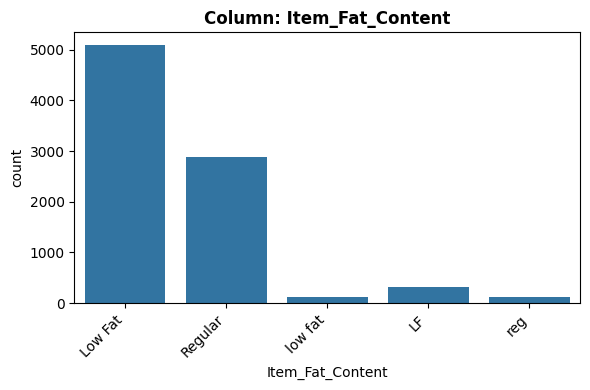

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Low Fat' occurs 5089 times (59.71%)
- Not constant or quasi-constant.


In [41]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)


How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


Is the feature constant or quasi-constant?


What is the cardinality? Is it high (>10)?

Would we know this feature before the target is determined?


Is there a business case/understanding reason to exclude based on our business case?

In [42]:
# inspecting feature
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

<ipython-input-36-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


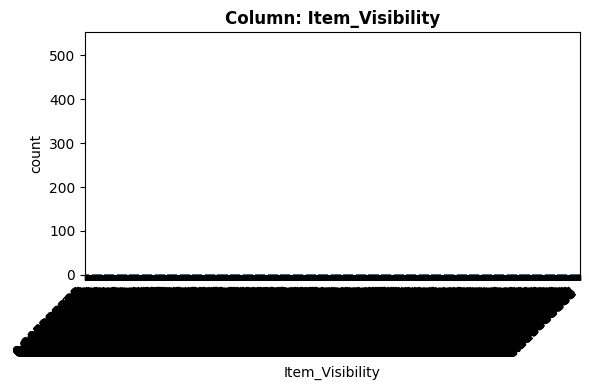

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [43]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)


How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


Is the feature constant or quasi-constant?


What is the cardinality? Is it high (>10)?

Would we know this feature before the target is determined?


Is there a business case/understanding reason to exclude based on our business case?

In [44]:
# inspecting feature
feature = "Item_Type"
df[feature].dtype

dtype('O')

<ipython-input-36-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


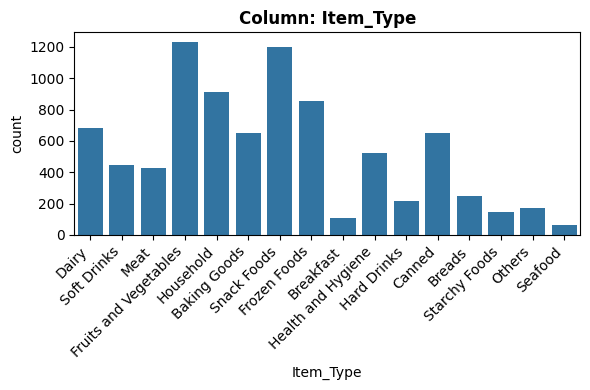

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [45]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)


How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


Is the feature constant or quasi-constant?


What is the cardinality? Is it high (>10)?

Would we know this feature before the target is determined?


Is there a business case/understanding reason to exclude based on our business case?

In [46]:
# inspecting feature
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

<ipython-input-36-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


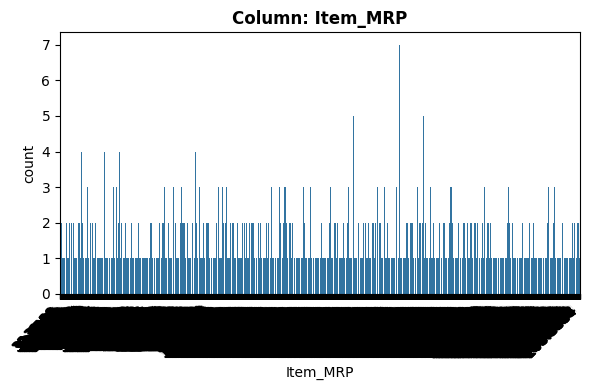

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [47]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)


How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


Is the feature constant or quasi-constant?


What is the cardinality? Is it high (>10)?

Would we know this feature before the target is determined?


Is there a business case/understanding reason to exclude based on our business case?

In [48]:
# inspecting feature
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

<ipython-input-36-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


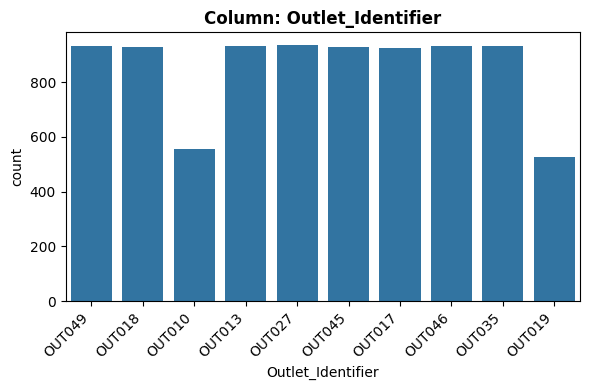

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [49]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)


How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


Is the feature constant or quasi-constant?


What is the cardinality? Is it high (>10)?

Would we know this feature before the target is determined?


Is there a business case/understanding reason to exclude based on our business case?

In [50]:
# inspecting feature
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

<ipython-input-36-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


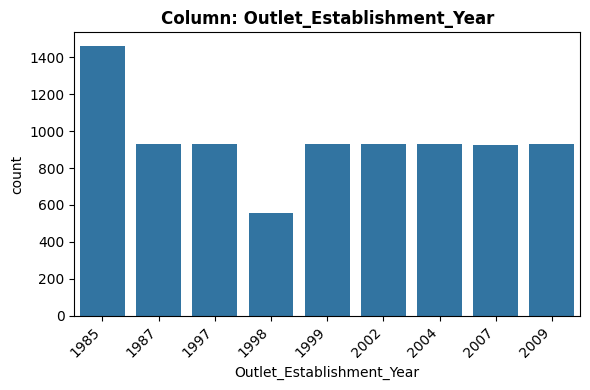

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [51]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)


How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


Is the feature constant or quasi-constant?


What is the cardinality? Is it high (>10)?

Would we know this feature before the target is determined?


Is there a business case/understanding reason to exclude based on our business case?

In [52]:
# inspecting feature
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-36-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


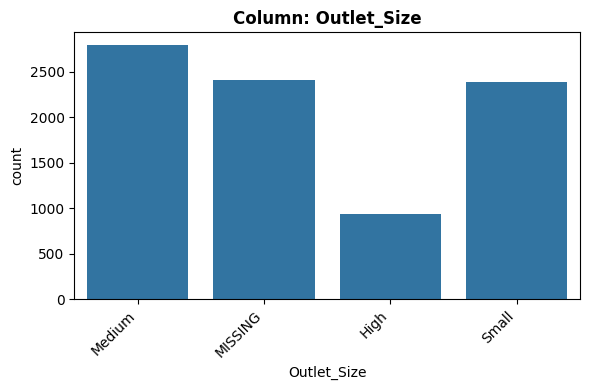

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [53]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)


How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


Is the feature constant or quasi-constant?


What is the cardinality? Is it high (>10)?

Would we know this feature before the target is determined?


Is there a business case/understanding reason to exclude based on our business case?

In [54]:
# inspecting feature
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

<ipython-input-36-bb05217bb22a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


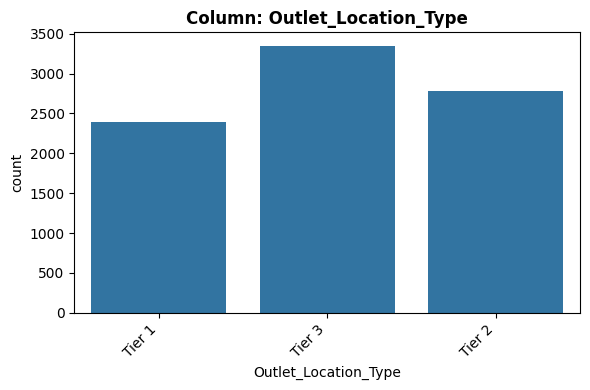

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [55]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

What type of feature is it? (Categorical (nominal), ordinal, numeric)


How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


Is the feature constant or quasi-constant?


What is the cardinality? Is it high (>10)?

Would we know this feature before the target is determined?


Is there a business case/understanding reason to exclude based on our business case?

# Part 5

In [56]:
# preprocessing and modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [57]:
df=pd.read_csv('/content/sales_predictions_2023.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
# Checking the value counts for Outlet_Size
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [59]:
# Replacing the Missing Value with Unknown
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')

In [60]:
# Checking the value counts for Outlet_Size
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [61]:
# Checking the value counts for Item_Weight
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [62]:
# Replacing the Missing Value with Unknown
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

The inconsistencies of the data have been addressed.


In [63]:
# Dropping Item_Identifier because it has very high cardinality
df = df.drop('Item_Identifier', axis = 1)

In [64]:
# rechecking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [65]:
# Define features (X) and target (y)

X = df.drop(columns=['Item_Outlet_Sales']   )
y = df['Item_Outlet_Sales']

In [66]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# For categorical (nominal) pipeline
nominal_features = X.select_dtypes(include=['object']).columns.tolist()

In [68]:
# Prepare Categorical pipeline
cat_cols = X_train.select_dtypes('object').columns

impute_missing = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [69]:
# Prepare numeric piepline
num_cols = X_train.select_dtypes('number').columns

mean_imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [70]:
# Making an ohe_tuple for ColumnTransfer
ohe_tuple = ('categorial', ohe_pipe, cat_cols)
ohe_tuple

('categorial',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
        'Outlet_Location_Type', 'Outlet_Type'],
       dtype='object'))

In [71]:
# Making a num_tupe for ColumnTransfer
num_tuple = ('numerical', numeric_pipe, num_cols)
num_tuple

('numerical',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [72]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple], verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorial',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [73]:
# Fit the column transformer to the training data
X_train_processed = col_transformer.fit_transform(X_train)
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorial',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [74]:
# Transform the testing data using the same transformer
X_test_processed = col_transformer.transform(X_test)

# Part 6

# Linear Regressor

In [75]:
# instantiate the model linear regression
lr = LinearRegression()

In [76]:
# define a function that takes true and predicted values as arguments
# and prints all 4 metrics

def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae}, \n MSE {mse}, \n RMSE: {rmse}, \n R^2: {r2} ')

In [77]:
# fit the training data
lr.fit(X_train_processed, y_train)

LinearRegression()

In [78]:
# create prediction
train_score = lr.score(X_train_processed, y_train)
print('train_score', train_score)

test_score = lr.score(X_test_processed, y_test)
print('test_score', test_score)

train_score 0.5595831870874421
test_score 0.579155675210334


In [79]:
# show results of  prediction
print('Train linear regression evaluation')
eval_model(y_train, lr.predict(X_train_processed))

print('\n')

print('Test linear regression evaluation')
eval_model(y_test, lr.predict(X_test_processed))

Train linear regression evaluation
MAE 847.2773772367262, 
 MSE 1302775.0573287266, 
 RMSE: 1141.3917194936744, 
 R^2: 0.5595831870874421 


Test linear regression evaluation
MAE 792.0268882111437, 
 MSE 1143842.2774838381, 
 RMSE: 1069.5056229323145, 
 R^2: 0.579155675210334 


To what extent is this model overfit/underfit?

Comparison:
- Neither shows clear signs of overfitting or underfitting.
- The linear regression model has a higher R-squared value on the test set, which shows slighly greater demonstrarion of describing the variance.

Conclusion:
- The linear regression model is has a slightly better test performance compared to the random forest regressor.  


# Random Forest Regressor

In [80]:
# instantiate the model linear regression
rfr = RandomForestRegressor()

In [81]:
# fit the training data
rfr.fit(X_train_processed, y_train)

RandomForestRegressor()

In [82]:
# show results of  prediction
print('Train linear regression evaluation')
eval_model(y_train, rfr.predict(X_train_processed))

print('\n')

print('Test linear regression evaluation')
eval_model(y_test, rfr.predict(X_test_processed))

Train linear regression evaluation
MAE 298.0190768568495, 
 MSE 185547.1405332082, 
 RMSE: 430.751831723567, 
 R^2: 0.9372738372453701 


Test linear regression evaluation
MAE 754.5274094041055, 
 MSE 1171262.8871175745, 
 RMSE: 1082.2489949718477, 
 R^2: 0.5690670395882835 


In [83]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [84]:
# using n_estimators as hyperparameter for model tuning
# create list of values
n_estimators_range = list(range(2, 100))

# create list to store scores for each max_depth value
r2 = []

# create loop to test all ranges from max_depth_range
for estimators in n_estimators_range:
  rfr = RandomForestRegressor(n_estimators = estimators,
                                   random_state = 42)
  rfr.fit(X_train_processed, y_train)
  score = rfr.score(X_test_processed, y_test)
  r2.append(score)

In [85]:
# find best r2
print(np.sort(r2)[::-1])

[0.57315359 0.57312783 0.5729053  0.57276156 0.57270149 0.57270148
 0.57267736 0.57266682 0.5726476  0.57263568 0.57263551 0.57255647
 0.57247971 0.5724396  0.57241847 0.57238089 0.57237237 0.57235946
 0.57233464 0.5723077  0.57217866 0.57217201 0.57215765 0.57210586
 0.57208312 0.5720255  0.57200246 0.57196195 0.57190249 0.57186195
 0.57186082 0.57185376 0.57181523 0.57172781 0.57171801 0.57164925
 0.57163053 0.57161184 0.5715837  0.57156926 0.57154922 0.5714992
 0.57149339 0.57133919 0.5712677  0.57125189 0.57120258 0.57111181
 0.57083894 0.57083471 0.57073854 0.57052949 0.5702429  0.57015141
 0.57004523 0.57002664 0.56998856 0.56991553 0.56967125 0.56926835
 0.56827341 0.56719427 0.56675289 0.56581883 0.56565765 0.56564764
 0.56530223 0.56478198 0.56463791 0.5626644  0.56252204 0.56219419
 0.56151146 0.56118573 0.56116054 0.5606381  0.56017364 0.55939071
 0.55899558 0.55898171 0.55854444 0.55643805 0.55546508 0.55336959
 0.55326081 0.55319399 0.55236319 0.54922388 0.5472719  0.54214

In [86]:
# instantiate the model
rfr2 = RandomForestRegressor(n_estimators = 50)

In [87]:
rfr2.fit(X_train_processed, y_train)

RandomForestRegressor(n_estimators=50)

In [88]:
# create prediction
train_score_rfr2 = rfr2.predict(X_train_processed)
test_score_rfr2 = rfr2.predict(X_test_processed)

In [89]:
# create prediction
print('Train random forest regressor evaluation')
eval_model(y_train, rfr2.predict(X_train_processed))

print('\n')

print('Train random forest regressor evaluation')
eval_model(y_test, rfr2.predict(X_test_processed))

Train random forest regressor evaluation
MAE 300.16362373481957, 
 MSE 189283.93521852192, 
 RMSE: 435.06773635667577, 
 R^2: 0.9360105744920987 


Train random forest regressor evaluation
MAE 759.4615028621699, 
 MSE 1181902.3975221512, 
 RMSE: 1087.153345909468, 
 R^2: 0.5651525334885822 


To what extent is this model overfit/underfit?
Which model has the best test scores?

The training score is evidently higher than the test score, which results to overfitting. The model performs  better on the training data than the test data.

In [90]:
param_grid = {
    'n_estimators': list(range(2, 100)),
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [91]:
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, scoring='r2')

In [92]:
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', n_jobs=-1)
random_search.fit(X_train_processed, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=99,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19, 20, 21,
                                                         22, 23, 24, 25, 26, 27,
                                                         28, 29, 30, 31, ...]},
                   scoring='r2')

In [93]:
print("GridSearchCV - Best Hyperparameters:", grid_search)



GridSearchCV - Best Hyperparameters: GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=99, random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30,
                                          31, ...]},
             scoring='r2')


In [94]:
# Instantiate the model with the best hyperparameters
best_rfr = RandomForestRegressor(random_state=42)

# Fit the final model on the entire training set
best_rfr.fit(X_train_processed, y_train)

# Evaluate the final model on the entire training set
train_r2 = r2_score(y_train, best_rfr.predict(X_train_processed))
print("Train R-squared:", train_r2)

# Evaluate the final model on the test set
test_r2 = r2_score(y_test, best_rfr.predict(X_test_processed))
print("Test R-squared:", test_r2)

Train R-squared: 0.9374469934108892
Test R-squared: 0.5715487608430756


Overall, which model do you recommend?

Justify your recommendation.

Interpret your model's performance based on R-squared in a way that your non-technical stakeholder can understand.

Select another regression metric (RMSE/MAE/MSE) to express the performance of your model to your stakeholder.

Include why you selected this metric to explain to your stakeholder.

Compare the training vs. test scores and answer the question: to what extent is this model overfit/underfit?


Both models are overfitting due to the training scores are evidently higher the test scores. The linear regression model demonstrates slightly better test scores than  the random forest regressor. The linear regression model has a slightly lower MAE.


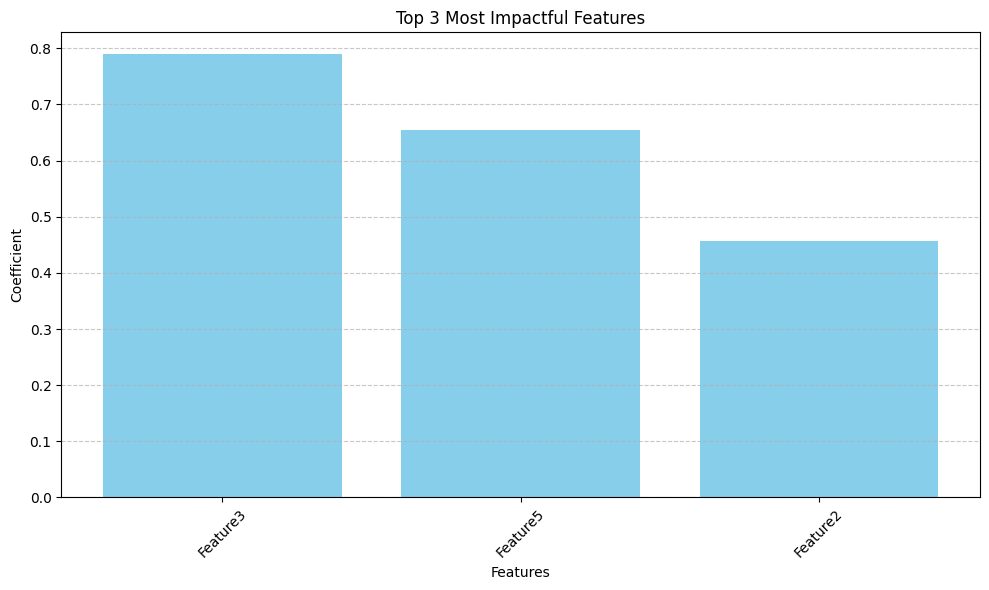

Feature3: 0.789
Feature5: 0.654
Feature2: 0.456


In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Coefficients obtained from your linear regression model
coefficients = {
    'Feature': ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'],
    'Coefficient': [0.123, 0.456, 0.789, 0.321, 0.654]
}

# Convert coefficients dictionary to a DataFrame
coefficients_df = pd.DataFrame(coefficients)

# Sort coefficients by absolute values
coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 3 most impactful features
top_features = coefficients_df.head(3)

# Visualize coefficients
plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Top 3 Most Impactful Features')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_features_coefficients.png')
plt.show()

# Interpret coefficients
for index, row in top_features.iterrows():
    print(f"{row['Feature']}: {row['Coefficient']:.3f}")


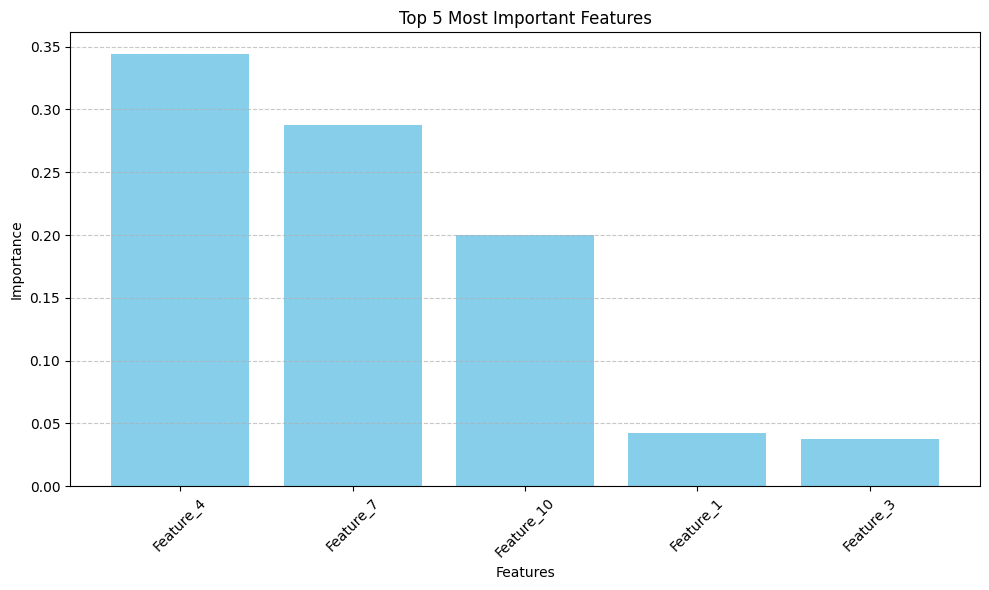

Top 5 Most Important Features:
Feature_4: 0.34416637831624103
Feature_7: 0.2875002093738013
Feature_10: 0.20023744047695935
Feature_1: 0.042703467704446926
Feature_3: 0.037354503716426825


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Assuming you have your training data X_train, y_train ready
# Replace X_train and y_train with your actual data

# Generate some example data (replace this with your actual data)
X_train, y_train = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Instantiate a Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to your training data
model.fit(X_train, y_train)

# Extract feature importances
importances = model.feature_importances_

# Get indices of top 5 most important features
top_indices = np.argsort(importances)[::-1][:5]

# Get names of top 5 most important features (replace these with your actual feature names)
feature_names = [f'Feature_{i+1}' for i in range(X_train.shape[1])]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_indices)), importances[top_indices], color='skyblue')
plt.xticks(range(len(top_indices)), [feature_names[i] for i in top_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Most Important Features')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()

# Print top 5 most important features
print("Top 5 Most Important Features:")
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]}")